In [164]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
import re
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [165]:
df = pd.read_csv("C:/Users/DURGESH/Downloads/SPRINGBOARD/Case studies/Unit 7 - Data Collection - APIs/Project Ideas and Datasets/Text Analysis//Netflix/netflix_titles.csv")

In [166]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor."
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive."


# Problem Statement : To predict the genre of a movie with the text in the description. 

# We would use the Genre mentioned in listed_in column to test the accuracy of our model. 
#This is a multiclass porbelm and currently we have more than 275 unique genres in the listed_in column. 
# We have catagorized these in 18 genres(given below) and created another column "genre" which has multiple genres for each movie.
#We have combined different genres like "Stand-Up Comedy" and "Stand-Up Comedy & Talk Shows" into "Comedy" 
#like "TV Dramas" and TV "Dramas" to Drama. 
#Also removed genres like "International TV Shows" or "TV Shows" as these genres are present along with other genres which we would consider. 

# Setp : Data Wrangling 

##final_genres : ("Anime Features","Anime Features").replace("Children & Family Movies","Children & Family")
#.replace("Classic & Cult TV","Classic").replace("Classic Movies","Classic").replace("Comedies","Comedy")
#.replace("Crime TV Shows","Crime").replace("Cult Movies","Cult").replace("Documentaries","Documenty")
#.replace("Docuseries","Documenty").replace("Dramas","Drama").replace("Faith & Spirituality","Spirituality")
#.replace("Horror Movies","Horror").replace("Independent Movies","").replace("International Movies","")
#.replace("International TV Shows","").replace("Kids TV","Children & Family").replace("Korean TV Shows","")
#.replace("LGBTQ Movies","LGBTQ").replace("Music & Musicals","").replace("Reality TV","").replace("Romantic Movies","Romance")
#.replace("Sci-Fi & Fantasy","Sci-Fi").replace("Science & Nature TV","Science&Nature").replace("Spanish-Language TV Shows","")
#.replace("Stand-Up Comedy","Comedy").replace("Stand-Up Comedy & Talk Shows","Comedy").replace("TV Action & Adventure","Action")
#.replace("TV Comedies","Comedy").replace("TV Dramas","Drama").replace("TV Horror","Horror").replace("TV Mysteries","")
#.replace("TV Sci-Fi & Fantasy","Sci-Fi").replace("TV Thrillers","Thriller").replace("Teen TV Shows","")
#.replace("Thrillers","Thriller").replace("Action & Adventure","Action").replace("Anime Features","Anime Features")
#.replace("Anime Series","Anime Features").replace("British TV Shows","").replace("Children & Family Movies","Children & Family")
#.replace("Classic & Cult TV","Classic").replace("Classic Movies","Classic").replace("Comedies","Comedy")
#.replace("Crime TV Shows","Crime").replace("Cult Movies","Cult").replace("Documentaries","Documenty")
#.replace("Docuseries","Documenty").replace("Dramas","Drama").replace("Horror Movies","Horror")
#.replace("Independent Movies","").replace("International Movies","").replace("International TV Shows","")
#.replace("Kids TV","Children & Family").replace("LGBTQ Movies","LGBTQ Movies").replace("Movies","")
#.replace("Music & Musicals","").replace("Reality TV","").replace("Romantic Movies","Romance").replace("Romantic TV Shows","Romance")
#.replace("Sci-Fi & Fantasy","Sci-Fi").replace("Spanish-Language TV Shows","").replace("Sports Movies","Sports")
#.replace("Stand-Up Comedy","Comedy").replace("Stand-Up Comedy & Talk Shows","Comedy").replace("TV Action & Adventure","Action")
#.replace("TV Comedies","Comedy").replace("TV Dramas","Drama").replace("TV Horror","Horror")
#.replace("TV Sci-Fi & Fantasy","Sci-Fi").replace("TV Shows","").replace("Thrillers","Thriller")]

In [170]:
df['genre'] = df['listed_in']

In [171]:
for i in range(len(df['genre'])):
    df['genre'][i] = df['genre'][i].replace("Anime Features","Anime Features").replace("Children & Family Movies","Children & Family").replace("Classic & Cult TV","Classic").replace("Classic Movies","Classic").replace("Comedies","Comedy").replace("Crime TV Shows","Crime").replace("Cult Movies","Cult").replace("Documentaries","Documenty").replace("Docuseries","Documenty").replace("Dramas","Drama").replace("Faith & Spirituality","Spirituality").replace("Horror Movies","Horror").replace("Independent Movies","").replace("International Movies","").replace("International TV Shows","").replace("Kids TV","Children & Family").replace("Korean TV Shows","").replace("LGBTQ Movies","LGBTQ").replace("Music & Musicals","").replace("Reality TV","").replace("Romantic Movies","Romance").replace("Sci-Fi & Fantasy","Sci-Fi").replace("Science & Nature TV","Science&Nature").replace("Spanish-Language TV Shows","").replace("Stand-Up Comedy","Comedy").replace("Stand-Up Comedy & Talk Shows","Comedy").replace("TV Action & Adventure","Action").replace("TV Comedies","Comedy").replace("TV Dramas","Drama").replace("TV Horror","Horror").replace("TV Mysteries","").replace("TV Sci-Fi & Fantasy","Sci-Fi").replace("TV Thrillers","Thriller").replace("Teen TV Shows","").replace("Thrillers","Thriller").replace("Action & Adventure","Action").replace("Anime Features","Anime Features").replace("Anime Series","Anime Features").replace("British TV Shows","").replace("Children & Family Movies","Children & Family").replace("Classic & Cult TV","Classic").replace("Classic Movies","Classic").replace("Comedies","Comedy").replace("Crime TV Shows","Crime").replace("Cult Movies","Cult").replace("Documentaries","Documenty").replace("Docuseries","Documenty").replace("Dramas","Drama").replace("Horror Movies","Horror").replace("Independent Movies","").replace("International Movies","").replace("International TV Shows","").replace("Kids TV","Children & Family").replace("LGBTQ Movies","LGBTQ Movies").replace("Movies","").replace("Music & Musicals","").replace("Reality TV","").replace("Romantic Movies","Romance").replace("Romantic TV Shows","Romance").replace("Sci-Fi & Fantasy","Sci-Fi").replace("Spanish-Language TV Shows","").replace("Sports Movies","Sports").replace("Stand-Up Comedy","Comedy").replace("Stand-Up Comedy & Talk Shows","Comedy").replace("TV Action & Adventure","Action").replace("TV Comedies","Comedy").replace("TV Dramas","Drama").replace("TV Horror","Horror").replace("TV Sci-Fi & Fantasy","Sci-Fi").replace("TV Shows","").replace("Thrillers","Thriller")

<ipython-input-171-e9cbca4453f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'][i] = df['genre'][i].replace("Anime Features","Anime Features").replace("Children & Family Movies","Children & Family").replace("Classic & Cult TV","Classic").replace("Classic Movies","Classic").replace("Comedies","Comedy").replace("Crime TV Shows","Crime").replace("Cult Movies","Cult").replace("Documentaries","Documenty").replace("Docuseries","Documenty").replace("Dramas","Drama").replace("Faith & Spirituality","Spirituality").replace("Horror Movies","Horror").replace("Independent Movies","").replace("International Movies","").replace("International TV Shows","").replace("Kids TV","Children & Family").replace("Korean TV Shows","").replace("LGBTQ Movies","LGBTQ").replace("Music & Musicals","").replace("Reality 

In [172]:
df.shape

(7787, 13)

In [173]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.",", TV Drama, TV Sci-Fi"
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.","Drama,"


In [185]:
genres = df['genre'].to_list()
my_string = ','.join(genres)
genres = my_string.split(",")
unique_genres = set(genres)
unique_genres

{'',
 'Action',
 'AnimeFeatures',
 'Children&Family',
 'Classic',
 'Comedy',
 'Crime',
 'Cult',
 'Documenty',
 'Drama',
 'Horror',
 'Kids',
 'LGBTQ',
 'Romance',
 'Sci-Fi',
 'Science&Nature',
 'Spirituality',
 'Sports',
 'Thriller'}

In [177]:
for i in range(len(df['genre'])):
    df['genre'][i] = df['genre'][i].replace(" ","").replace(",,",",").replace('TVComedy','Comedy').replace('TVSci-Fi','Sci-Fi').replace('TVThriller','Thriller').replace("Kids'TV","Kids").replace("TVDrama", "Drama").replace("Comedy&TalkShows", "Comedy")

<ipython-input-177-4e76cbfd9ce2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'][i] = df['genre'][i].replace(" ","").replace(",,",",").replace('TVComedy','Comedy').replace('TVSci-Fi','Sci-Fi').replace('TVThriller','Thriller').replace("Kids'TV","Kids").replace("TVDrama", "Drama").replace("Comedy&TalkShows", "Comedy")


In [184]:
for i in range(len(df['genre'])):
    df['genre'][i] = re.sub('^,+', '', df['genre'][i])
    df['genre'][i] = re.sub(',+$', '', df['genre'][i])

<ipython-input-184-b327f53f93d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'][i] = re.sub('^,+', '', df['genre'][i])
<ipython-input-184-b327f53f93d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'][i] = re.sub(',+$', '', df['genre'][i])


In [186]:
# Dropping data which do not have any genre after data cleaning. About 255 rows has been dropped out of 7700 plus rows. 

In [187]:
df_new = df[~(df['genre']=='')]

In [188]:
df_new.shape

(7529, 13)

In [190]:
# This shows the unique genres we created. 
genres = df_new['genre'].to_list()
my_string = ','.join(genres)
genres = my_string.split(",")
unique_genres = set(genres)
unique_genres

{'Action',
 'AnimeFeatures',
 'Children&Family',
 'Classic',
 'Comedy',
 'Crime',
 'Cult',
 'Documenty',
 'Drama',
 'Horror',
 'Kids',
 'LGBTQ',
 'Romance',
 'Sci-Fi',
 'Science&Nature',
 'Spirituality',
 'Sports',
 'Thriller'}

In [191]:
(df_new['genre']=='Comedy&TalkShows').sum()

0

In [192]:
def nestedlist(list): 
    return [[el] for el in list]

In [193]:
nestedlist(df_new['genre'])

[['Drama,Sci-Fi'],
 ['Drama'],
 ['Horror'],
 ['Action,Sci-Fi'],
 ['Drama'],
 ['Drama'],
 ['Horror'],
 ['Drama'],
 ['Horror'],
 ['Horror,Thriller'],
 ['Drama,Thriller'],
 ['Crime,Drama'],
 ['Crime,Documenty'],
 ['Documenty,Sports'],
 ['Sci-Fi,Thriller'],
 ['Drama,Thriller'],
 ['Drama'],
 ['Drama,Thriller'],
 ['Comedy,Drama'],
 ['Sports'],
 ['Drama'],
 ['Action,Drama'],
 ['Drama'],
 ['Drama'],
 ['AnimeFeatures'],
 ['Documenty'],
 ['Horror,Thriller'],
 ['Documenty'],
 ['Comedy'],
 ['Documenty'],
 ['Drama,Romance'],
 ['Drama,Romance'],
 ['Comedy'],
 ['Comedy,Romance'],
 ['Documenty,Sports'],
 ['Comedy,Drama'],
 ['Comedy,Drama'],
 ['Romance,Comedy'],
 ['Comedy'],
 ['Comedy'],
 ['Horror'],
 ['Comedy'],
 ['Drama'],
 ['Action,Sci-Fi'],
 ['Crime,Drama'],
 ['Drama,Romance'],
 ['Drama,Romance,Sports'],
 ['Comedy,Romance'],
 ['Comedy,Drama'],
 ['Action'],
 ['Romance,Drama'],
 ['Documenty'],
 ['Documenty,Science&Nature'],
 ['Drama,Sports'],
 ['Documenty'],
 ['Drama'],
 ['Drama'],
 ['Drama,Sports'],

In [194]:
df_new['genre'] = nestedlist(df_new['genre'])

<ipython-input-194-145687093af2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['genre'] = nestedlist(df_new['genre'])


In [196]:
df_new.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.","[Drama,Sci-Fi]"
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.",[Drama]
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",[Horror]


In [197]:
df.to_csv("newdata1.csv")

# Step : Modelling 

In [198]:
#importing packages for analysis and modeling 

import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [199]:
genres = df_new['genre'].to_list()

In [200]:
len(genres)

7529

In [201]:
all_genres = nltk.FreqDist(sum(genres,[])) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

In [202]:
all_genres_df

,Genre,Count
0,"Drama,Sci-Fi",42
1,Drama,1046
2,Horror,138
3,"Action,Sci-Fi",86
4,"Horror,Thriller",111
...,...,...
212,"Classic,Crime,Drama",1
213,"Action,Documenty,Sports",1
214,"LGBTQ,Thriller",1
215,"LGBTQ,Romance",3


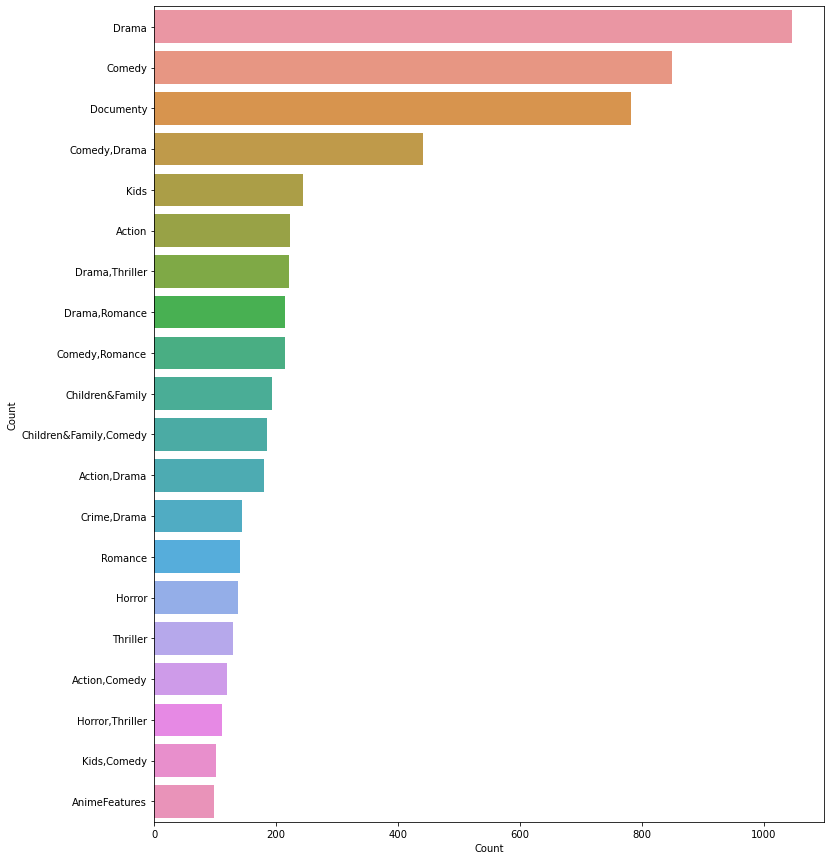

In [203]:
g = all_genres_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

# Cleaning the text in Description which we would use to predict the genre

In [204]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z0-9]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [205]:
df_new['clean_desc'] = df_new['description'].apply(lambda x: clean_text(x))

<ipython-input-205-79bc9a60b467>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clean_desc'] = df_new['description'].apply(lambda x: clean_text(x))


In [207]:
df_new.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,clean_desc
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.","[Drama,Sci-Fi]",in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.",[Drama],after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",[Horror],when an army recruit is found dead his fellow soldiers are forced to confront a terrifying secret thats haunting their jungle island training camp


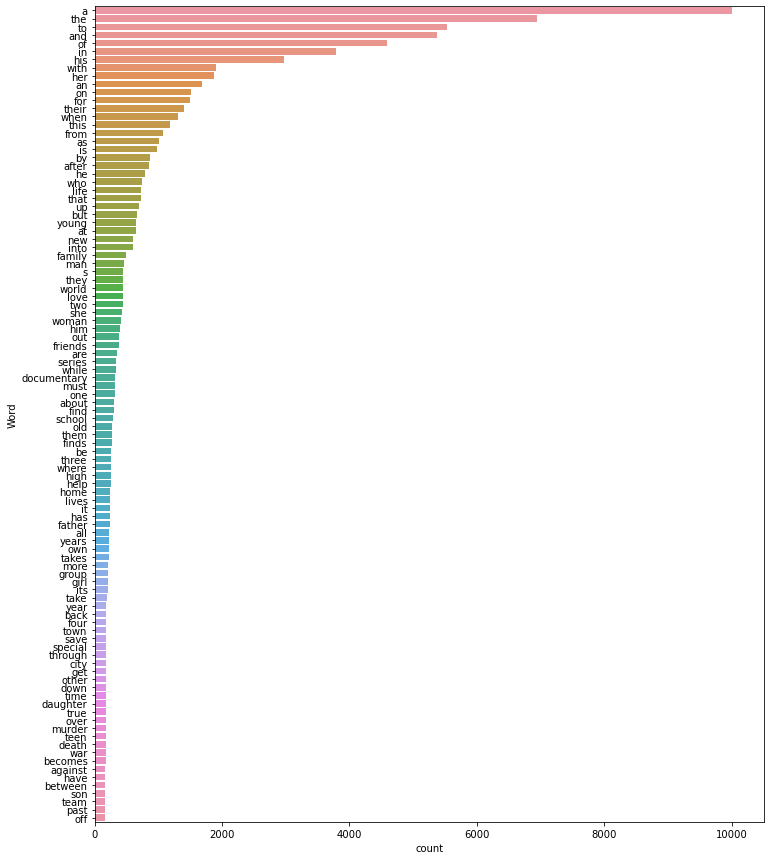

In [208]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(df_new['clean_desc'], 100)

In [209]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DURGESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [210]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df_new['clean_desc_nostop'] = df_new['clean_desc'].apply(lambda x: remove_stopwords(x))

<ipython-input-210-4812bbbcfb40>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clean_desc_nostop'] = df_new['clean_desc'].apply(lambda x: remove_stopwords(x))


In [211]:
df_new.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,clean_desc,clean_desc_nostop
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.","[Drama,Sci-Fi]",in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor,future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.",[Drama],after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive,devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alive


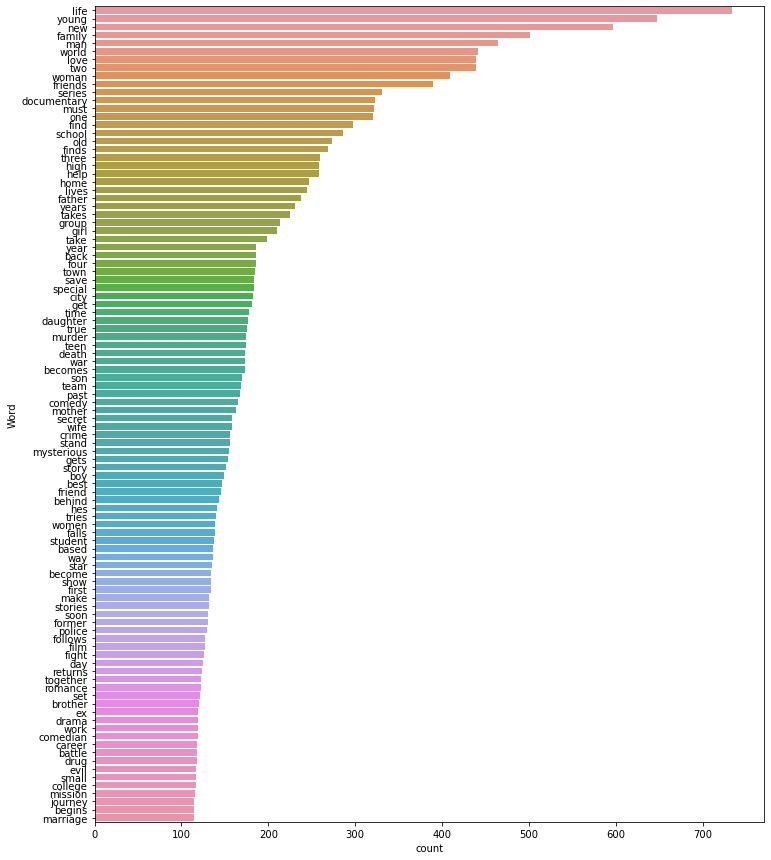

In [212]:
# print 100 most frequent words from clean data with no stop words
freq_words(df_new['clean_desc_nostop'], 100)

# MODELLING 

In [213]:
#Why do we do fit and transform seperately???

from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df_new['genre'])

# transform target variable
y = multilabel_binarizer.transform(df_new['genre'])

In [214]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000)

In [141]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(df_new['clean_desc_nostop'], y, test_size=0.2, random_state=9)

In [215]:
df_new['clean_desc_nostop']

0                                 future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor
1            devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alive
2       army recruit found dead fellow soldiers forced confront terrifying secret thats haunting jungle island training camp
3                  postapocalyptic world rag doll robots hide fear dangerous machines exterminate brave newcomer joins group
4        brilliant group students become card counting experts intent swindling millions las vegas casinos playing blackjack
                                                                ...                                                         
7781      dragged civilian life former superhero must train new crop youthful saviors military preps attack familiar villain
7782                  lebanons civil war deprives zozo family hes left grief little means escapes sweden search grandparents


In [216]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [217]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
import sklearn.metrics  as metrics

In [218]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [219]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

C:\Users\DURGESH\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\DURGESH\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 32 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\DURGESH\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 36 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\DURGESH\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\DURGESH\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 48 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C

OneVsRestClassifier(estimator=LogisticRegression())

In [220]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [221]:
y_pred[1099]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [223]:
multilabel_binarizer.inverse_transform(y_pred)[90:100]

[(), (), (), (), (), (), (), (), (), ()]

In [224]:
metrics.f1_score(yval, y_pred, average="micro")

0.10344827586206896

In [225]:
metrics.accuracy_score(yval, y_pred)

0.055776892430278883

In [226]:
### This sheet is still in progress. I am not able to get the correct lables. 
#Need help with choosing the correct model and metrics for this probelm statement.
# We will discuss this in our next call.

In [158]:
df['genre'] = df['genre'].replace("Thrillers", "Thriller")

<ipython-input-17-37ba3a448255>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'][i] = df['genre'][i].replace("Anime Features","Anime Features").replace("Children & Family Movies","Children & Family").replace("Classic & Cult TV","Classic").replace("Classic Movies","Classic").replace("Comedies","Comedy").replace("Crime TV Shows","Crime").replace("Cult Movies","Cult").replace("Documentaries","Documenty").replace("Docuseries","Documenty").replace("Dramas","Drama").replace("Faith & Spirituality","Spirituality").replace("Horror Movies","Horror").replace("Independent Movies","").replace("International Movies","").replace("International TV Shows","").replace("Kids TV","Children & Family").replace("Korean TV Shows","").replace("LGBTQ Movies","").replace("Music & Musicals","").replace("Reality TV",""

In [10]:
df['genre'][0].replace("TV Dramas","Drama").replace("International TV Shows", "")

',TVDrama,Sci-Fi'

In [27]:
df['genre'][0]

', TV Drama, TV Sci-Fi'

In [12]:
df['genre'].unique()

array([',TVDrama,Sci-Fi', 'Drama,', 'Horror,', 'Action,Sci-Fi', 'Drama',
       ',TVDrama,', 'Horror,Thriller', 'Drama,Thriller', 'Crime,TVDrama',
       'Crime,Documenty,', 'Documenty,', ',Sci-Fi,Thriller', ',TVDrama',
       'Comedy,Drama,', '', 'Action,Drama,', 'AnimeFeatures,',
       'Documenty', 'Comedy', 'Drama,Romance', 'Comedy,Romance',
       ',Comedy', 'Comedy,', 'Drama,Romance,', 'Action', ',',
       'Crime,TVDrama,', 'Crime,Documenty', 'Action,', 'Sci-Fi',
       'Action,Comedy,', 'Comedy,Drama', 'Documenty,Spirituality',
       'Action,Comedy', "Kids'TV,Action,Sci-Fi", ',Thriller', "Kids'TV",
       'Children&Family,Comedy', 'Comedy,Drama,Romance', 'Action,Drama',
       'Comedy,Thriller', ',Documenty,', 'Children&Family,Drama,',
       'Children&Family', 'Drama,Sci-Fi', ',Comedy,TVDrama',
       'Action,Classic,Drama', 'Children&Family,Drama', 'Action,Romance',
       'Children&Family,Drama,Romance', 'Children&Family,Comedy,',
       'Classic,Cult,Drama', 'Comedy,Horror

In [28]:
#df[["genre", "listed_in"]].df['show_id'] == 's154']
df[df['show_id'] == 's16']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,"September 1, 2019",2014,TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...,"Drama, , Thriller"


<ipython-input-62-3ad39ab37492>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'][i] = df['genre'][i].replace(" ","").replace(",,",",").replace('TVComedy','Comedy').replace('TVSci-Fi','Sci-Fi').replace('TVThriller','Thriller').replace("Kids'TV","Kids").replace("TVDrama", "Drama")


In [123]:
for genre in unique_genres:
    (df['genre']=="genre").sum()

SyntaxError: 'return' outside function (<ipython-input-123-8e99fc5486fc>, line 2)

In [133]:
for genre in unique_genres:
    x = []
    x.append(i)

SyntaxError: 'return' outside function (<ipython-input-133-7fb8947367ad>, line 4)

<ipython-input-138-b327f53f93d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'][i] = re.sub('^,+', '', df['genre'][i])
<ipython-input-138-b327f53f93d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'][i] = re.sub(',+$', '', df['genre'][i])


In [139]:
df['genre']

0        Drama,Sci-Fi
1               Drama
2              Horror
3       Action,Sci-Fi
4               Drama
            ...      
7782            Drama
7783            Drama
7784        Documenty
7785                 
7786        Documenty
Name: genre, Length: 7787, dtype: object

In [151]:
(df['genre']=='').sum()

375

In [155]:
df.to_csv("newdata1.csv")

In [154]:
%pwd

'C:\\Users\\DURGESH\\Downloads\\SPRINGBOARD\\Case studies\\Unit 7 - Data Collection - APIs\\Project Ideas and Datasets'